# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [146]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("GPU Devices: ", tf.config.experimental.list_physical_devices('GPU'))

Num GPUs Available:  1
GPU Devices:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [147]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

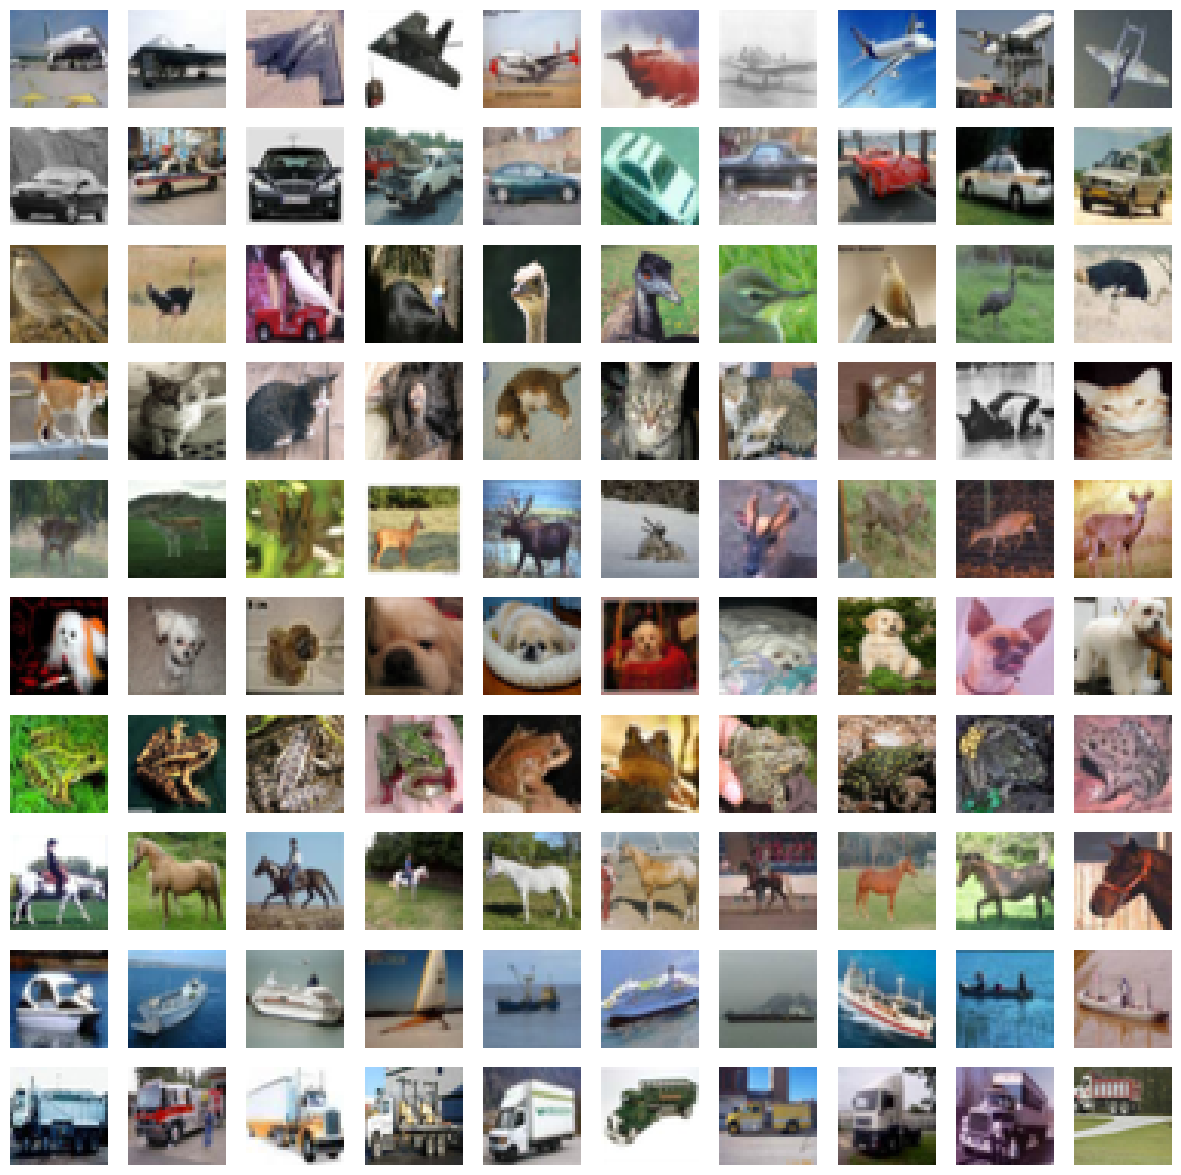

In [148]:
# Your code here :
import matplotlib.pyplot as plt
# Visualize 10 random samples from each class
num_classes = 10
samples_per_class = 10
fig, axes = plt.subplots(num_classes, samples_per_class, figsize=(15, 15))

for i in range(num_classes):
	class_indices = np.where(y_train == i)[0]
	random_indices = np.random.choice(class_indices, samples_per_class, replace=False)
	for j, idx in enumerate(random_indices):
		ax = axes[i, j]
		ax.imshow(x_train[idx])
		ax.axis('off')

plt.show()

In [149]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [150]:
#Normalize data 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print(x_train.shape)
print(x_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [151]:
from keras.backend import clear_session
clear_session()

In [152]:
# Your code here :
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 100)               720100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 722,006
Trainable params: 722,006
Non-trainable params: 0
__________________________________________________

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [153]:
# Your code here :
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1)


Epoch 1/50
88/88 [==============================] - 2s 15ms/step - loss: 2.0952 - accuracy: 0.2426 - val_loss: 1.9749 - val_accuracy: 0.3004
Epoch 2/50
88/88 [==============================] - 1s 12ms/step - loss: 1.9319 - accuracy: 0.3191 - val_loss: 1.9019 - val_accuracy: 0.3270
Epoch 3/50
88/88 [==============================] - 1s 12ms/step - loss: 1.8622 - accuracy: 0.3469 - val_loss: 1.8355 - val_accuracy: 0.3518
Epoch 4/50
88/88 [==============================] - 1s 12ms/step - loss: 1.8045 - accuracy: 0.3712 - val_loss: 1.8177 - val_accuracy: 0.3664
Epoch 5/50
88/88 [==============================] - 1s 12ms/step - loss: 1.7580 - accuracy: 0.3852 - val_loss: 1.7649 - val_accuracy: 0.3780
Epoch 6/50
88/88 [==============================] - 1s 12ms/step - loss: 1.7235 - accuracy: 0.4025 - val_loss: 1.7056 - val_accuracy: 0.4066
Epoch 7/50
88/88 [==============================] - 1s 12ms/step - loss: 1.6838 - accuracy: 0.4157 - val_loss: 1.6926 - val_accuracy: 0.4094
Epoch 8/50
88

*   Plot the cross entropy loss curve and the accuracy curve

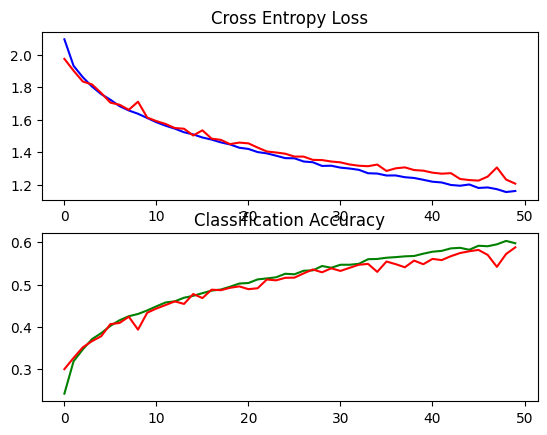

In [154]:
# Your code here :
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

In [155]:
# Your code here :
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.2102 - accuracy: 0.5783
Test loss: 1.2101737260818481
Test accuracy: 0.5782999992370605


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [156]:
from keras.backend import clear_session
clear_session()

In [159]:
# Your code here :
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(10, activation='softmax'))

model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                      

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [160]:
# Your code here :
# Compile the model
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [161]:
history2 = model2.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
98/98 [==============================] - 3s 26ms/step - loss: 2.1347 - accuracy: 0.2245 - val_loss: 1.9916 - val_accuracy: 0.2938
Epoch 2/50
98/98 [==============================] - 2s 20ms/step - loss: 1.9284 - accuracy: 0.3218 - val_loss: 1.9232 - val_accuracy: 0.3108
Epoch 3/50
98/98 [==============================] - 2s 19ms/step - loss: 1.8016 - accuracy: 0.3694 - val_loss: 1.8435 - val_accuracy: 0.3445
Epoch 4/50
98/98 [==============================] - 2s 19ms/step - loss: 1.7152 - accuracy: 0.4009 - val_loss: 1.6690 - val_accuracy: 0.4232
Epoch 5/50
98/98 [==============================] - 2s 19ms/step - loss: 1.6387 - accuracy: 0.4263 - val_loss: 1.6113 - val_accuracy: 0.4377
Epoch 6/50
98/98 [==============================] - 2s 19ms/step - loss: 1.5813 - accuracy: 0.4461 - val_loss: 1.5631 - val_accuracy: 0.4433
Epoch 7/50
98/98 [==============================] - 2s 19ms/step - loss: 1.5317 - accuracy: 0.4643 - val_loss: 1.5256 - val_accuracy: 0.4622
Epoch 8/50
98

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

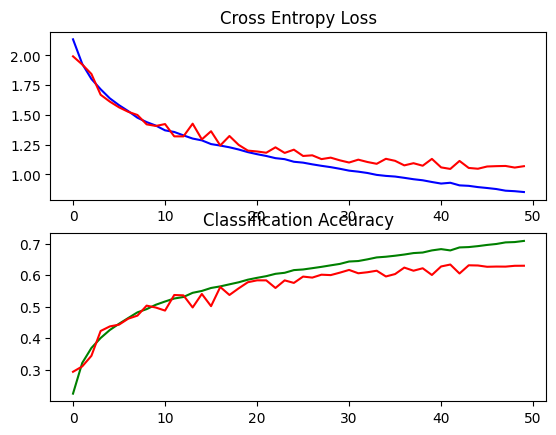

In [162]:
# Your code here :
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history2.history['loss'], color='blue', label='train')
plt.plot(history2.history['val_loss'], color='red', label='val')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history2.history['accuracy'], color='green', label='train')
plt.plot(history2.history['val_accuracy'], color='red', label='val')
plt.show()

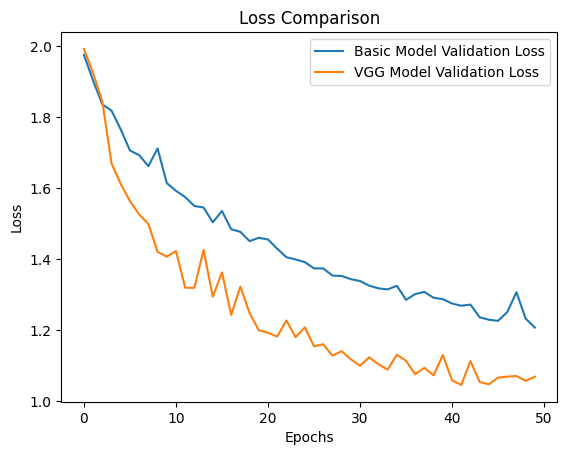

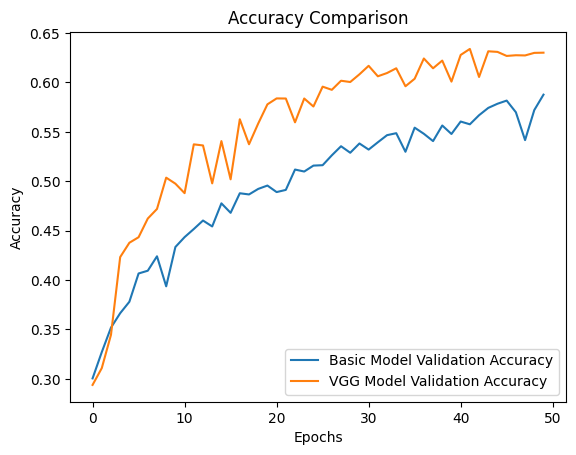

In [163]:
# Plot both models' loss curves
plt.plot(history.history['val_loss'], label='Basic Model Validation Loss')
plt.plot(history2.history['val_loss'], label='VGG Model Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot both models' accuracy curves
plt.plot(history.history['val_accuracy'], label='Basic Model Validation Accuracy')
plt.plot(history2.history['val_accuracy'], label='VGG Model Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [164]:
# Your code here :
test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
print('Test loss - VGG:', test_loss2)
print('Test accuracy - VGG:', test_acc2)


# Your code here :
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss - Basic:', test_loss)
print('Test accuracy - Basic:', test_acc)


313/313 [==============================] - 2s 4ms/step - loss: 1.0688 - accuracy: 0.6301
Test loss - VGG: 1.06878662109375
Test accuracy - VGG: 0.6301000118255615
313/313 [==============================] - 1s 4ms/step - loss: 1.2102 - accuracy: 0.5783
Test loss - Basic: 1.2101737260818481
Test accuracy - Basic: 0.5782999992370605


In [165]:
#Confusion matrix for VGG basic model
predictions_vgg = model2.predict(x_test)

print(predictions_vgg[0])

import numpy as np
predictions_vgg = np.argmax(predictions_vgg, axis=1)

from sklearn.metrics import confusion_matrix
gt = np.argmax(y_test, axis=1)

confusion_matrix(gt, predictions_vgg)

313/313 [==============================] - 1s 3ms/step
[1.1560477e-03 2.6435798e-04 5.6343391e-03 7.6690102e-01 1.2438004e-02
 1.8675859e-01 4.9079014e-03 6.3906185e-04 7.7285320e-03 1.3572089e-02]


array([[603,  26,  33,   9,  60,  10,  15,  17, 142,  85],
       [ 14, 716,   3,   4,   9,   6,   8,   4,  45, 191],
       [ 78,   6, 302,  25, 295, 110,  83,  55,  24,  22],
       [ 18,  18,  32, 269, 196, 263, 108,  35,  15,  46],
       [ 13,   3,  16,  17, 800,  37,  44,  48,  16,   6],
       [ 11,   6,  23,  88, 121, 621,  42,  54,  14,  20],
       [  3,   7,  14,  25, 151,  35, 721,  15,   9,  20],
       [ 11,   3,   9,  15, 135,  67,   9, 696,   9,  46],
       [ 50,  55,   4,   7,  19,  11,   5,   4, 776,  69],
       [ 14,  80,   3,   6,  21,   7,  16,  21,  35, 797]], dtype=int64)

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [166]:
from keras.backend import clear_session
clear_session()

In [168]:
# Your code here :
#Create model
model3 = Sequential()
model3.add(Conv2D(64, (3, 3), activation='relu',  kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu',  kernel_initializer='he_uniform', padding='same'))
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(10, activation='softmax'))
model3.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 15, 15, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [169]:
# Your code here :
model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
98/98 [==============================] - 10s 89ms/step - loss: 2.1560 - accuracy: 0.2359 - val_loss: 2.2084 - val_accuracy: 0.2196
Epoch 2/50
98/98 [==============================] - 7s 73ms/step - loss: 1.9039 - accuracy: 0.3234 - val_loss: 1.7708 - val_accuracy: 0.3841
Epoch 3/50
98/98 [==============================] - 7s 73ms/step - loss: 1.7584 - accuracy: 0.3762 - val_loss: 1.6482 - val_accuracy: 0.4104
Epoch 4/50
98/98 [==============================] - 7s 74ms/step - loss: 1.6597 - accuracy: 0.4096 - val_loss: 1.9931 - val_accuracy: 0.3018
Epoch 5/50
98/98 [==============================] - 7s 73ms/step - loss: 1.5860 - accuracy: 0.4382 - val_loss: 1.5416 - val_accuracy: 0.4478
Epoch 6/50
98/98 [==============================] - 7s 73ms/step - loss: 1.5297 - accuracy: 0.4584 - val_loss: 1.4951 - val_accuracy: 0.4713
Epoch 7/50
98/98 [==============================] - 7s 73ms/step - loss: 1.4714 - accuracy: 0.4811 - val_loss: 1.4644 - val_accuracy: 0.4786
Epoch 8/50
9

In [170]:
test_loss3, test_acc3 = model3.evaluate(x_test, y_test)
print('Test loss - VGG Complete:', test_loss3)
print('Test accuracy - VGG Complete:', test_acc3)

313/313 [==============================] - 2s 5ms/step - loss: 1.0105 - accuracy: 0.6725
Test loss - VGG Complete: 1.010543704032898
Test accuracy - VGG Complete: 0.6725000143051147


In [171]:
#Confusion matrix for VGG Complete model
predictions_vgg2 = model3.predict(x_test)

print(predictions_vgg2[0])

import numpy as np
predictions_vgg2 = np.argmax(predictions_vgg2, axis=1)

from sklearn.metrics import confusion_matrix
gt1 = np.argmax(y_test, axis=1)

confusion_matrix(gt1, predictions_vgg2)

313/313 [==============================] - 1s 4ms/step
[2.6348312e-04 3.4547953e-03 2.6836997e-04 9.3559945e-01 2.2579500e-04
 5.8648877e-02 2.9230359e-04 2.5486929e-06 1.2438983e-03 5.8184105e-07]


array([[799,  27,  38,  17,   8,  10,  12,   6,  50,  33],
       [ 19, 814,  11,  13,   1,   3,  12,   4,  22, 101],
       [ 93,  10, 587,  86,  43,  73,  50,  31,   8,  19],
       [ 31,  20,  77, 556,  29, 153,  62,  24,  13,  35],
       [ 62,  11, 134, 103, 452,  60,  75,  77,  16,  10],
       [ 22,  13,  68, 199,  26, 585,  29,  39,   8,  11],
       [ 12,  18,  61,  92,  21,  27, 739,   8,   6,  16],
       [ 34,   7,  55,  62,  36,  66,   9, 689,   6,  36],
       [104,  54,  14,  11,   5,   7,   7,   5, 761,  32],
       [ 41, 125,  14,  21,   2,   9,   9,  10,  26, 743]], dtype=int64)

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:
-Activation functions introduce non-linearity into the network, allowing it to learn and model complex data pattern.

2 - Key Differences between sigmoid and softmax:
-The sigmoid activation function outputs a value between 0 and 1 for each input, making it suitable for binary classification problems.
-The softmax activation function outputs a probability distribution over multiple classes, making it suitable for multi-class classification problems.
-In other words, use sigmoid for binary classification and softmax for multi-class classification.

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
-Categorical crossentropy is used for multi-class classification problems where each sample belongs to one of many classes.
-Binary crossentropy is used for binary classification problems where each sample belongs to one of two classes.
-Categorical used for Multi-class classification anf Binary is used for binary classification
